# Telecom Customer Churn

### Importing the libraries

In [84]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

data=pd.read_csv("Churn (1).csv")

### Understanding the data

In [85]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Rows:7043

Columns:21

Total Categorical Features:17

Total Numerical Features:4

Missing values:11 in totalcharges

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Missing values in the dataset

In [5]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that there are 11 missing values in the TotalCharges column which account for only 0.15% of the total dataset,so we can drop these 11 rows.

In [6]:
data1=data.dropna()

In [7]:
data1.shape

(7032, 21)

### Data Manipulation

In [8]:
#label encoding the target column
data1.Churn=data1.Churn.map({"Yes":1,"No":0})

In [9]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


We can group the tenure data into different groups(easy for visualization) and add this as a new column to the dataframe.

In [10]:
#converting tenure into 6 groups
def tenure_grp(x):
    if x>0 and x<=12:
        return "tenure_0-1_yr"
    elif x>12 and x<=24:
        return "tenure_1-2_yr"
    elif x>24 and x<=36:
        return "tenure_2-3_yr"
    elif x>36 and x<=48:
        return "tenure_3-4_yr"
    elif x>48 and x<=60:
        return "tenure_4-5_yr"
    elif x>60 and x<=72:
        return "tenure_5-6_yr"

In [11]:
data1["tenure_grp"]=data1["tenure"].apply(tenure_grp)

In [12]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,tenure_0-1_yr
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,tenure_2-3_yr
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,tenure_0-1_yr
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,tenure_3-4_yr
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,tenure_0-1_yr


In [13]:
#data distribution 73% class 0-27% class1
data1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### Data Visualization

Churn Distribution

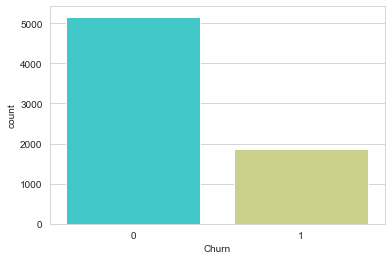

In [14]:
ax=sns.countplot(data1["Churn"],palette="rainbow")

The data is highly imbalanced showing the amount of people churned is more less than the amount of people not churned.So to avoid our model from predicting the most occuring class we will need to apply class weights or smote before training.

1) Gender

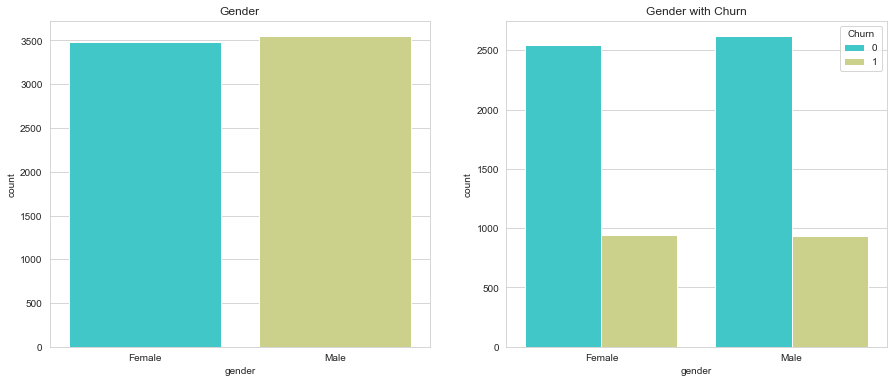

In [15]:

fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.countplot(data1.gender,ax=axes[0],palette="rainbow")
axes[0].title.set_text("Gender")
sns.countplot(data1.gender,hue=data1.Churn,ax=axes[1],palette="rainbow")
axes[1].title.set_text("Gender with Churn")

The graph shows that the data consist of equal distribution of male and female and the amount of churned or not is almost same for male and female.Therefore gender won't help much in predicting the values. 

2) Senior Citizen

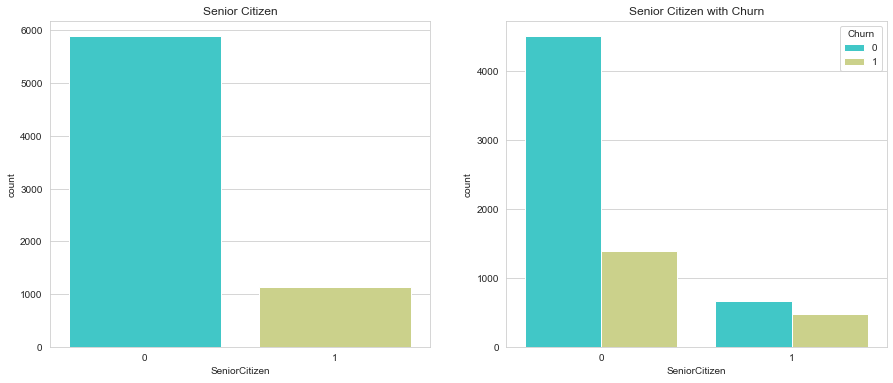

In [16]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.countplot(data1.SeniorCitizen,ax=axes[0],palette="rainbow")
axes[0].title.set_text("Senior Citizen")
sns.countplot(data1.SeniorCitizen,hue=data1.Churn,ax=axes[1],palette="rainbow")
axes[1].title.set_text("Senior Citizen with Churn")

The major customers of the company  are the young people(~6000) but we can also see that the churning rate of senior citizen is more than the younger people.So the primary focus should be on the senior citizen and reducing the senior citizen churning rate.

3) Partner

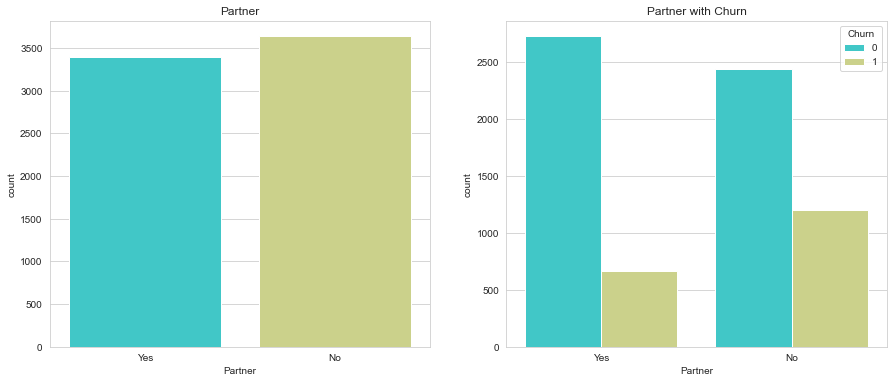

In [17]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.countplot(data1.Partner,ax=axes[0],palette="rainbow")
axes[0].title.set_text("Partner")
sns.countplot(data1.Partner,hue=data1.Churn,ax=axes[1],palette="rainbow")
axes[1].title.set_text("Partner with Churn")

Almost 50% of the customers have partners while other 50 don't but from the other graph we can see that the churning rate of customers with no partners is high.

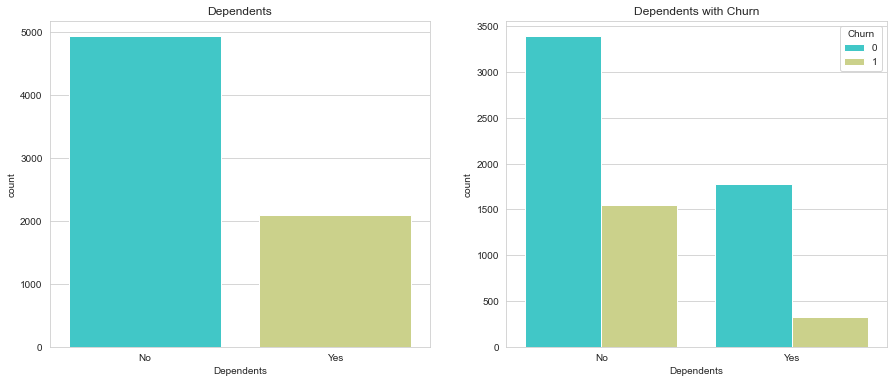

In [18]:
fig,axes=plt.subplots(1,2,figsize=(15,6))
sns.countplot(data1.Dependents,ax=axes[0],palette="rainbow")
axes[0].title.set_text("Dependents")
sns.countplot(data1.Dependents,hue=data1.Churn,ax=axes[1],palette="rainbow")
axes[1].title.set_text("Dependents with Churn")

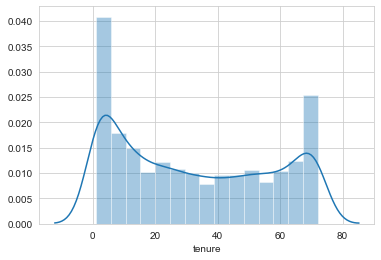

In [19]:
sns.distplot(data1.tenure)

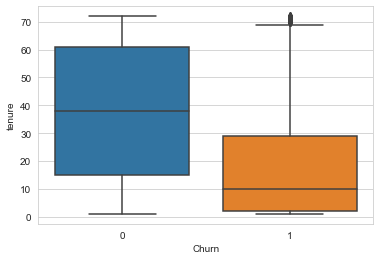

In [20]:
sns.boxplot(x="Churn",y="tenure",data=data1)

The people who have churned have a median tenure of around 10 months.

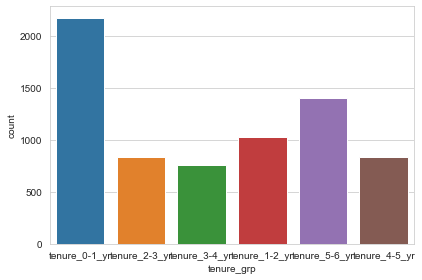

In [21]:

sns.countplot(data1.tenure_grp)
plt.tight_layout()

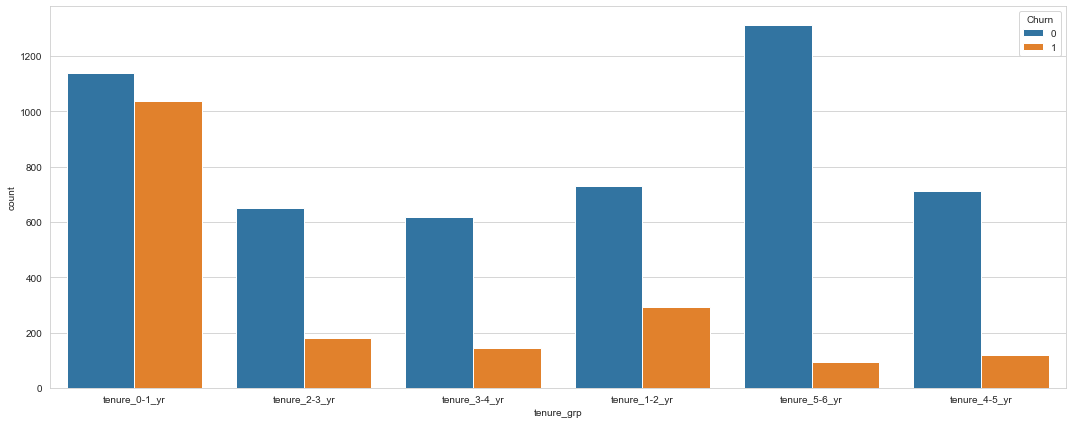

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(data1["tenure_grp"],hue=data1["Churn"])
plt.tight_layout()

The maximum number of people is for a tenure of 0-1 year followed by 5-6 years and the hightest churning rate is for 0-1 year

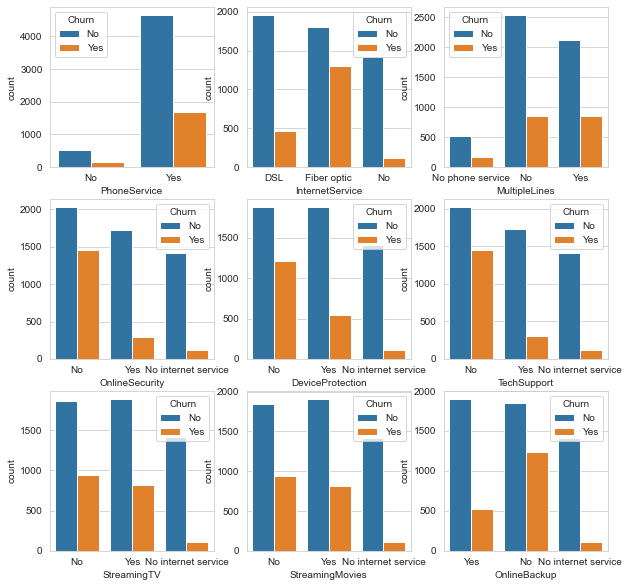

In [23]:
#Services
f,axes=plt.subplots(3,3,figsize=(10,10))
sns.countplot(data.PhoneService,hue=data["Churn"],ax=axes[0][0])
sns.countplot(data.InternetService,hue=data["Churn"],ax=axes[0][1])
sns.countplot(data.MultipleLines,hue=data["Churn"],ax=axes[0][2])
sns.countplot(data.OnlineSecurity,hue=data["Churn"],ax=axes[1][0])
sns.countplot(data.DeviceProtection,hue=data["Churn"],ax=axes[1][1])
sns.countplot(data.TechSupport,hue=data["Churn"],ax=axes[1][2])
sns.countplot(data.StreamingTV,hue=data["Churn"],ax=axes[2][0])
sns.countplot(data.StreamingMovies,hue=data["Churn"],ax=axes[2][1])
sns.countplot(data.OnlineBackup,hue=data["Churn"],ax=axes[2][2])

Customers who have fiber optic(internet service)have a high churning rate compared to other internet services.
Customers who dont have Online Security,Device Protection,Tech Support,Online Backup have a high churning rate.
People who have or dont have StreamingTv or StreamingMovies have the same churning rate so these two features won't be the key factors in determining the predictions.


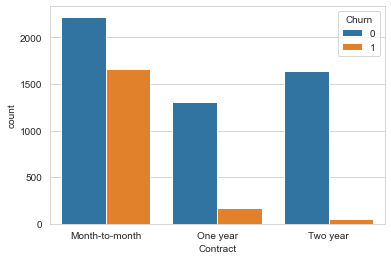

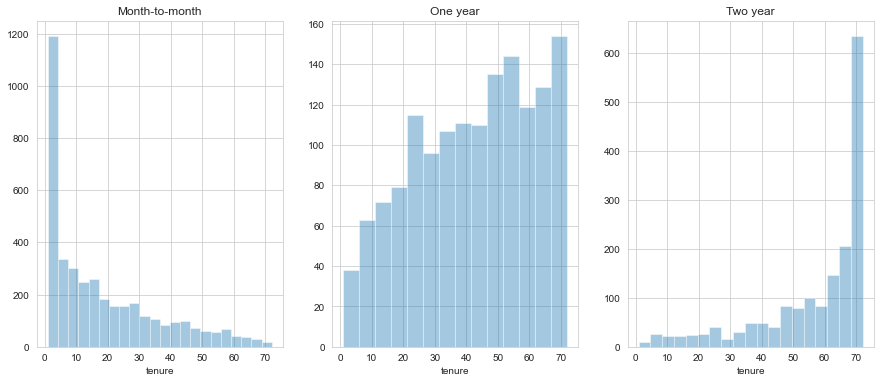

In [24]:
#CONTRACTS
sns.countplot(data1.Contract,hue=data1["Churn"])
f,axes=plt.subplots(1,3,figsize=(15,6))
sns.distplot(data1[data1["Contract"]=="Month-to-month"]["tenure"],ax=axes[0],kde=False)
axes[0].title.set_text("Month-to-month")
sns.distplot(data1[data1["Contract"]=="One year"]["tenure"],ax=axes[1],kde=False)
axes[1].title.set_text("One year")
sns.distplot(data1[data1["Contract"]=="Two year"]["tenure"],ax=axes[2],kde=False)
axes[2].title.set_text("Two year")

We can see that the monthly contracts last for a very short period of time 1-2 months while the 2 year contract last for a longer period of time (70 months) showing that people having longer contracts last for a long period of time.

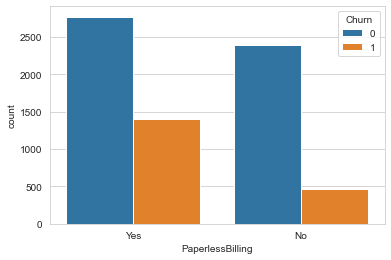

In [25]:
#BILLING
sns.countplot(data1.PaperlessBilling,hue=data1["Churn"])

The churning rate of people with paperless billing is high.

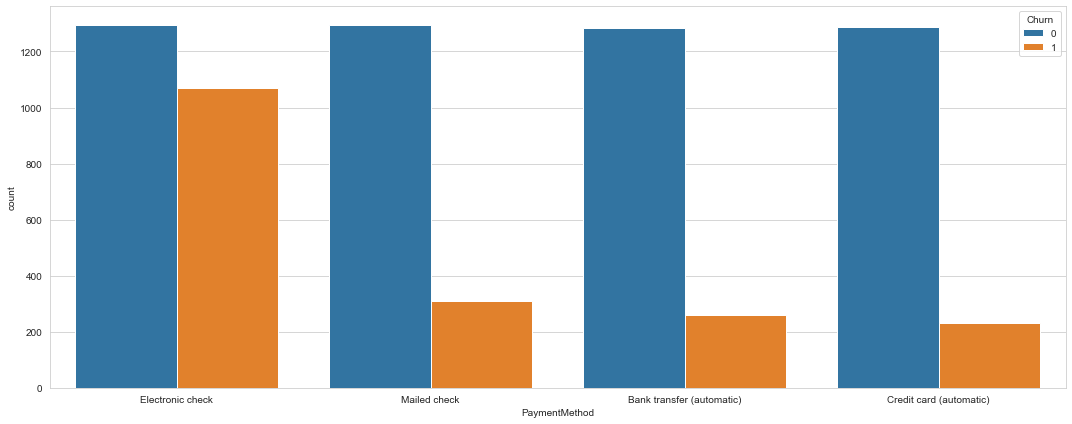

In [26]:
#payment method
plt.figure(figsize=(15,6))
sns.countplot(data1.PaymentMethod,hue=data1["Churn"])
plt.tight_layout()

Electronic check has a very high churning rate.So the company should improve the system for electronic check or ask users about the problem they face while paying through electronic check.

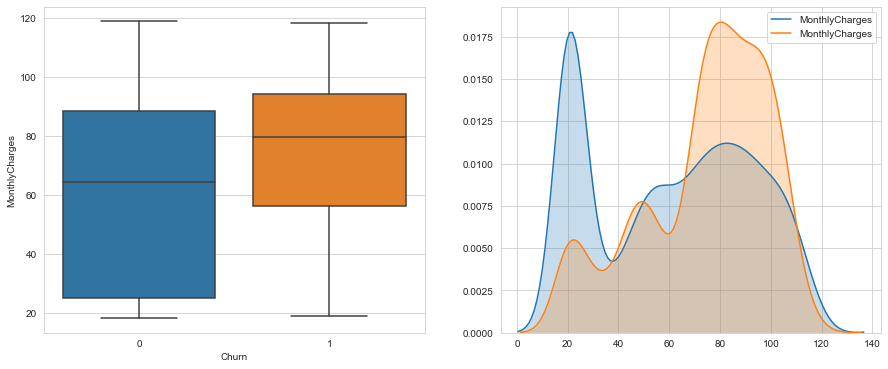

In [27]:
#Monthlycharges
f,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(y="MonthlyCharges",x="Churn",data=data1,ax=axes[0])
sns.kdeplot(data1[data1["Churn"]==0]["MonthlyCharges"],ax=axes[1],shade=True)
sns.kdeplot(data1[data1["Churn"]==1]["MonthlyCharges"],ax=axes[1],shade=True)

Customers having a higher monthly charges have a churning rate.

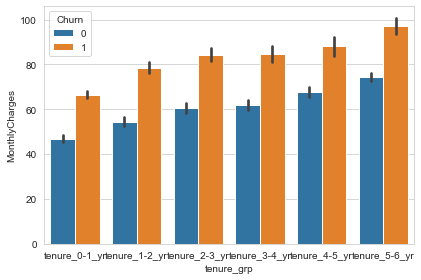

In [28]:
sns.barplot(x="tenure_grp",y="MonthlyCharges",data=data1,hue="Churn",order=["tenure_0-1_yr","tenure_1-2_yr","tenure_2-3_yr","tenure_3-4_yr","tenure_4-5_yr","tenure_5-6_yr"])
plt.tight_layout()

As the tenure increase increase in monthly charges increase the churning rate.

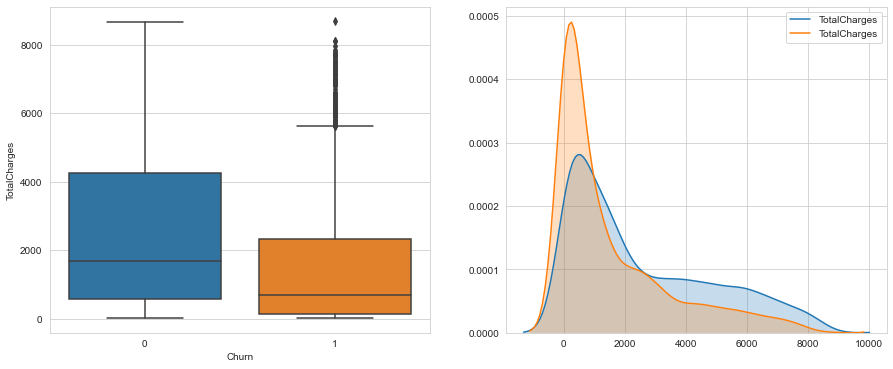

In [29]:
#total charges
f,axes=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(y="TotalCharges",x="Churn",data=data1,ax=axes[0])
sns.kdeplot(data1[data1["Churn"]==0]["TotalCharges"],ax=axes[1],shade=True)
sns.kdeplot(data1[data1["Churn"]==1]["TotalCharges"],ax=axes[1],shade=True)

Customers having a low total charge have high churning rate showing that the customer stays for a shorter period of time.

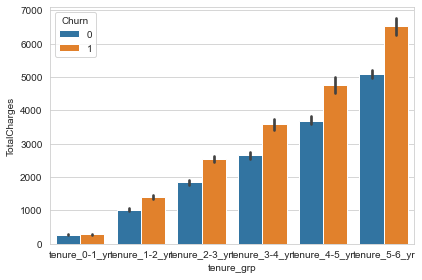

In [30]:
sns.barplot(x="tenure_grp",y="TotalCharges",data=data1,hue="Churn",order=["tenure_0-1_yr","tenure_1-2_yr","tenure_2-3_yr","tenure_3-4_yr","tenure_4-5_yr","tenure_5-6_yr"])
plt.tight_layout()

As the tenure increase increase in total charges increase the churning rate.


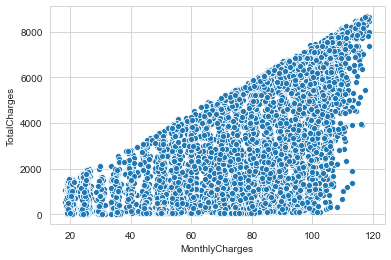

In [31]:
sns.scatterplot(x="MonthlyCharges",y="TotalCharges",data=data1)

Increase in monthly charge increases the total charges.

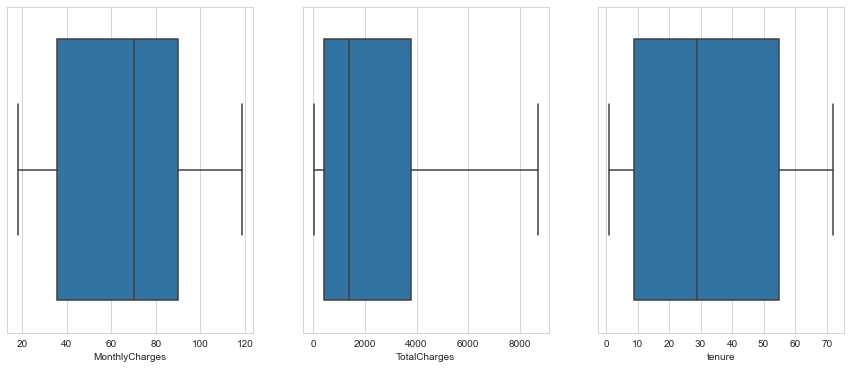

In [32]:
#outliers
f,axes=plt.subplots(1,3,figsize=(15,6))
sns.boxplot("MonthlyCharges",data=data1,ax=axes[0])
sns.boxplot("TotalCharges",data=data1,ax=axes[1])
sns.boxplot("tenure",data=data1,ax=axes[2])

We can see that there are no points beyond the whisker which shows there are no outliers.

### Conclusion of Data Visualization

1) From the chart we got to know that gender doesn't play a important in predicting the churning rate.
   
2) The major customers are the young people but the churning rate is high for senior citizen so are primary focus should be on them.
    
3) No partners have a high churning rate.

4) If the tenure is low the churning rate is high

5) The majority customers are in the tenure group of 0-1 years showing an early leave or in the 5-6 years showing loyalty to the company

6) Customers using fibre optics(internet service) tend to churn more and customers not having online protection ,backup,device protection and Techsupport tend to churn more.Company should improve the fibre optics line(high speed or better connectivity) and convince people to buy the services like online protection ,backup,device protection and Techsupport(discounts on these services).

7) Customers having a longer contract (2 years) stay more with the company,therefore the company should promote people to opt for the longer contract.

8)The compamy should improve the paperlessbilling system or the company should find better ways of paying online.The comapny should get feedback from the user about the problems they are facing.

9)The compamy should improve the electronic check system and  take feedback from the user.

10) The comapny should include some offers in monthly charges(or total charges) or cashbacks.The company should come up with better prices which meets the overall need of the user and at the same time increase its profit.



### Implement Machine Learning Models

In [33]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,tenure_0-1_yr
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,tenure_2-3_yr
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,tenure_0-1_yr
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,tenure_3-4_yr
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,tenure_0-1_yr


Get dummies for multicategory columns(more than 3)

In [103]:
#get_dummies on multicategory columns
multi=[]
for i in data1.columns:
    if data1[i].nunique()>=3 and data1[i].nunique()<=6 :
        multi.append(i)
        
        
        

In [36]:
data1=pd.get_dummies(data1,columns=multi)

In [37]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
      

In [38]:
#removing these columns because of multiple instances of the no internet service column
data1.drop(["MultipleLines_No phone service",'OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)

Train test Split

In [39]:
#creating a train-validation split
from sklearn.model_selection import train_test_split
train,val=train_test_split(data1,test_size=3043/len(data1),random_state=0)

Label Encoding for Binary columns

In [104]:
#label encoding for binary columns
binary=[]
for i in data1.columns:
    if data1[i].nunique()==2:
        binary.append(i)

In [40]:
#converting binary categorical columns using label encoding
from sklearn.preprocessing import LabelEncoder
for i in binary:
        lb=LabelEncoder()
        train[i]=lb.fit_transform(train[i])
        val[i]=lb.transform(val[i])


Correlation of target Column with other variables

In [41]:
train.corrwith(train["Churn"])

gender                                     0.002714
SeniorCitizen                              0.150367
Partner                                   -0.136895
Dependents                                -0.166415
tenure                                    -0.346387
PhoneService                               0.004558
PaperlessBilling                           0.207421
MonthlyCharges                             0.180872
TotalCharges                              -0.197786
Churn                                      1.000000
MultipleLines_No                          -0.031263
MultipleLines_Yes                          0.034492
InternetService_DSL                       -0.106938
InternetService_Fiber optic                0.284593
InternetService_No                        -0.219443
OnlineSecurity_No                          0.321877
OnlineSecurity_Yes                        -0.156202
OnlineBackup_No                            0.259531
OnlineBackup_Yes                          -0.081011
DeviceProtec

In [42]:
#dropping gender because of low correlation value(0.002)
train.drop("gender",axis=1,inplace=True)
val.drop("gender",axis=1,inplace=True)

Scaling the numerical columns

In [43]:
#storing the numerical columns for scaling
num=["MonthlyCharges","TotalCharges","tenure"]

    

In [44]:
#scaling the numerical values 
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()


In [45]:
scaled_col=ss.fit_transform(train[num])

In [46]:
train_ss=pd.DataFrame(data=scaled_col,columns=[num])

In [47]:
train.reset_index(drop=True)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_tenure_0-1_yr,tenure_grp_tenure_1-2_yr,tenure_grp_tenure_2-3_yr,tenure_grp_tenure_3-4_yr,tenure_grp_tenure_4-5_yr,tenure_grp_tenure_5-6_yr
0,7493-GVFIO,0,0,0,57,1,0,20.55,1252.85,0,...,0,1,0,0,0,0,0,0,1,0
1,5173-WXOQV,0,1,0,2,1,1,64.20,143.65,0,...,0,0,0,1,1,0,0,0,0,0
2,1031-IIDEO,0,0,0,1,1,1,70.85,70.85,1,...,0,0,1,0,1,0,0,0,0,0
3,1307-ATKGB,0,0,0,24,1,1,89.55,2187.15,0,...,0,0,1,0,0,1,0,0,0,0
4,1945-XISKS,0,1,0,67,1,0,19.65,1335.20,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,9975-SKRNR,0,0,0,1,1,0,18.90,18.90,0,...,0,0,0,1,1,0,0,0,0,0
3985,2662-NNTDK,0,0,0,65,1,0,24.80,1600.95,0,...,0,1,0,0,0,0,0,0,0,1
3986,1228-FZFRV,0,1,1,50,1,0,105.95,5341.80,1,...,0,1,0,0,0,0,0,0,1,0
3987,8198-RKSZG,0,1,1,14,1,0,80.45,1137.05,0,...,0,1,0,0,0,1,0,0,0,0


In [48]:
train=train.merge(train_ss,on=train.index)

In [49]:
scaled_col_test=ss.transform(val[num])

In [50]:
val_ss=pd.DataFrame(data=scaled_col_test,columns=[num])

In [51]:
val.reset_index(drop=True)

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_tenure_0-1_yr,tenure_grp_tenure_1-2_yr,tenure_grp_tenure_2-3_yr,tenure_grp_tenure_3-4_yr,tenure_grp_tenure_4-5_yr,tenure_grp_tenure_5-6_yr
0,5088-QZLRL,0,0,0,1,1,0,20.65,20.65,0,...,0,0,1,0,1,0,0,0,0,0
1,0787-LHDYT,0,0,0,16,1,1,20.60,330.25,0,...,0,1,0,0,0,1,0,0,0,0
2,8562-GHPPI,0,0,0,1,1,0,19.80,19.80,0,...,0,1,0,0,1,0,0,0,0,0
3,1334-FJSVR,0,0,0,1,0,1,24.25,24.25,1,...,0,0,1,0,1,0,0,0,0,0
4,3551-HUAZH,1,0,0,1,1,1,74.40,74.40,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,2320-TZRRH,0,0,0,20,1,0,19.50,403.15,0,...,0,0,0,1,0,1,0,0,0,0
3039,8071-SBTRN,0,0,0,70,1,1,111.15,7737.55,0,...,0,0,0,1,0,0,0,0,0,1
3040,6849-OYAMU,0,1,1,19,1,0,100.00,1888.65,1,...,1,0,0,0,0,1,0,0,0,0
3041,5857-TYBCJ,1,1,0,44,1,1,89.20,4040.20,0,...,0,0,1,0,0,0,0,1,0,0


In [52]:
val=val.merge(val_ss,on=val.index)

Splitting the data into X_train ,y_train,X_test,y_test

In [53]:
X_train=train.drop(["key_0","customerID","Churn"],axis=1)

In [54]:
y_train=train["Churn"]

In [55]:
X_val=val.drop(["key_0","customerID","Churn"],axis=1)
y_val=val["Churn"]

In [56]:
X_val.drop(num,axis=1,inplace=True)#removing duplicate columns

In [57]:
X_train.drop(num,axis=1,inplace=True)#removing duplicate columns

In [58]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((3989, 38), (3989,), (3043, 38), (3043,))

Computing the class weights for imbalanced class distribution

In [59]:
#class weights as our dataset is imbalanced
from sklearn.utils import compute_class_weight
class_wt=compute_class_weight("balanced",np.unique(y_train),y_train)

In [60]:
class_wt1={0:class_wt[0],1:class_wt[1]}

In [61]:
class_wt1

{0: 0.6790943139257746, 1: 1.895912547528517}

In [66]:
from sklearn.metrics import plot_confusion_matrix,classification_report,plot_roc_curve

# Model Building 

1) Logistic Regression

0.8094760591626974
0.807426881367072
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2226
           1       0.68      0.54      0.60       817

    accuracy                           0.81      3043
   macro avg       0.76      0.72      0.74      3043
weighted avg       0.80      0.81      0.80      3043



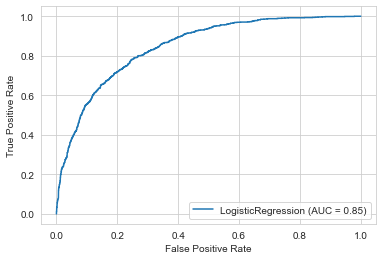

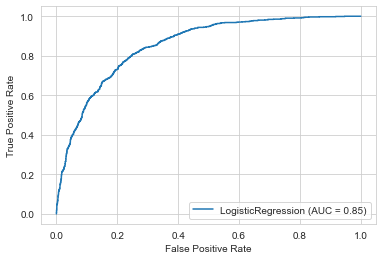

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train,y_train))
print(lr.score(X_val,y_val))
plot_roc_curve(lr,X_train,y_train)
plot_roc_curve(lr,X_val,y_val)
print(classification_report(y_val,lr.predict(X_val)))

2) KNN Classifiers

0.8373025821007771
0.7633913900755833
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2226
           1       0.56      0.55      0.55       817

    accuracy                           0.76      3043
   macro avg       0.70      0.69      0.70      3043
weighted avg       0.76      0.76      0.76      3043



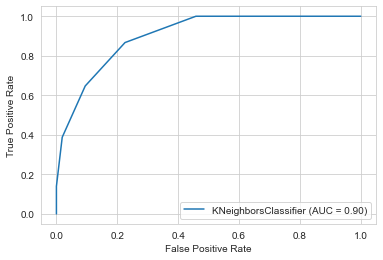

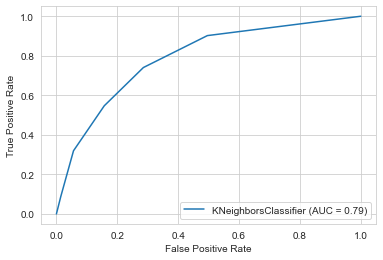

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_val,y_val))
plot_roc_curve(knn,X_train,y_train)
plot_roc_curve(knn,X_val,y_val)
print(classification_report(y_val,knn.predict(X_val)))

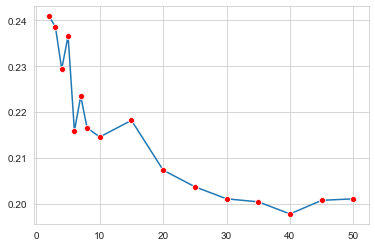

In [69]:
#elbow method 
n=[2,3,4,5,6,7,8,10,15,20,25,30,35,40,45,50]
error_rate=[]
for i in n:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_val)
    error_rate.append(np.mean(predict!=y_val))
sns.lineplot(n,error_rate,marker="o",markerfacecolor="red")

The maximum score is at n_neighbors=40

0.8037102030584107
0.8021689122576405
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      2226
           1       0.66      0.55      0.60       817

    accuracy                           0.80      3043
   macro avg       0.75      0.72      0.73      3043
weighted avg       0.79      0.80      0.80      3043



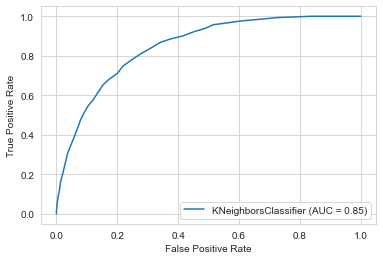

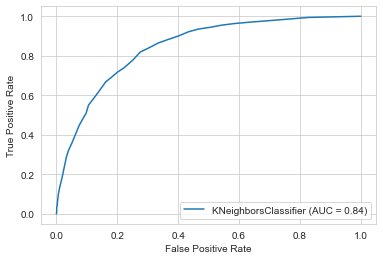

In [70]:
knn=KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_val,y_val))
plot_roc_curve(knn,X_train,y_train)
plot_roc_curve(knn,X_val,y_val)
print(classification_report(y_val,knn.predict(X_val)))

3) Random Forest

0.9974931060416145
0.7903384817614196
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2226
           1       0.64      0.49      0.56       817

    accuracy                           0.79      3043
   macro avg       0.74      0.70      0.71      3043
weighted avg       0.78      0.79      0.78      3043



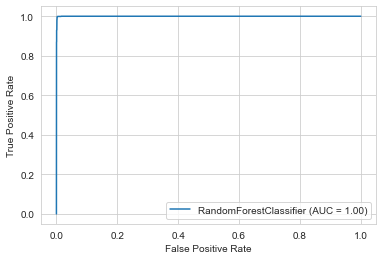

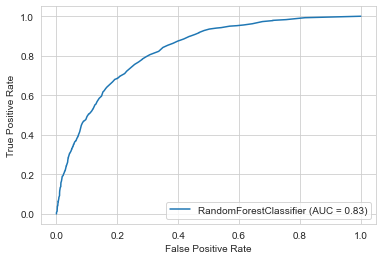

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(class_weight=class_wt1,random_state=0)
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_val,y_val))
plot_roc_curve(rf,X_train,y_train)
plot_roc_curve(rf,X_val,y_val)
print(classification_report(y_val,rf.predict(X_val)))



Our model is overfitting the data so we will need to apply some regularization to our model.

In [72]:
from sklearn.model_selection import GridSearchCV
params={"max_depth":[2,3,4,5,7,9,10,11,12,13],"max_features":[2,3,4,5,7,8,9],"n_estimators":[200,300,400,500,1000]}
grf=GridSearchCV(RandomForestClassifier(class_weight=class_wt1,random_state=0),param_grid=params,cv=5,n_jobs=-1,verbose=2,scoring="roc_auc")
grf.fit(X_train,y_train)

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed: 11.7min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.6790943139257746,
                                                            1: 1.895912547528517},
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 7, 9, 10, 11, 12, 13],
                         'max_features': [2, 3, 4, 5, 7, 8, 9],
                         'n_estimators': [200, 300, 400, 500, 1000]},
             scoring='roc_auc', verbose=2)

In [75]:
grf.best_estimator_

RandomForestClassifier(class_weight={0: 0.6790943139257746,
                                     1: 1.895912547528517},
                       max_depth=7, max_features=4, n_estimators=400,
                       random_state=0)

0.7904236650789671
0.7666776207689779
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2226
           1       0.55      0.79      0.65       817

    accuracy                           0.77      3043
   macro avg       0.73      0.77      0.74      3043
weighted avg       0.81      0.77      0.78      3043



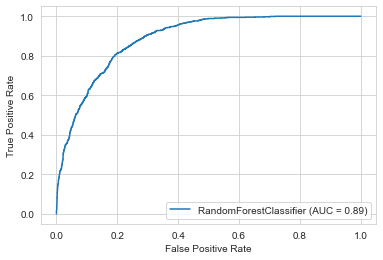

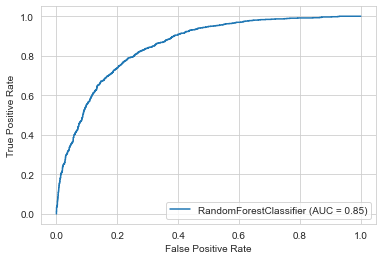

In [76]:
rf1=RandomForestClassifier(class_weight=class_wt1,max_depth=7, max_features=4, n_estimators=400,
                       random_state=0)
rf1.fit(X_train,y_train)
print(rf1.score(X_train,y_train))
print(rf1.score(X_val,y_val))
plot_roc_curve(rf1,X_train,y_train)
plot_roc_curve(rf1,X_val,y_val)
print(classification_report(y_val,rf1.predict(X_val)))

0.7718726497869141
0.7587906671048308
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2226
           1       0.53      0.79      0.64       817

    accuracy                           0.76      3043
   macro avg       0.72      0.77      0.73      3043
weighted avg       0.81      0.76      0.77      3043



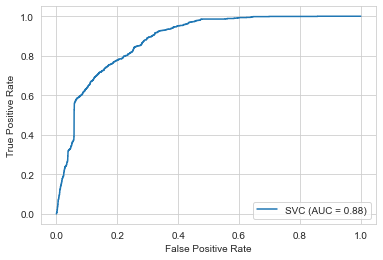

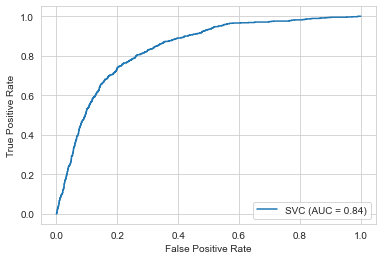

In [77]:
#svm

from sklearn.svm import SVC
svm=SVC(class_weight=class_wt1,random_state=0)
svm.fit(X_train,y_train)
print(svm.score(X_train,y_train))
print(svm.score(X_val,y_val))
plot_roc_curve(svm,X_train,y_train)
plot_roc_curve(svm,X_val,y_val)
print(classification_report(y_val,svm.predict(X_val)))

In [78]:
from sklearn.model_selection import GridSearchCV
params={"C":[0.01,0.05,0.1,0.5,1,10,50,100,150,1000],"gamma":[0.02,1,10,100]}
grf=GridSearchCV(SVC(class_weight=class_wt1,random_state=0),param_grid=params,cv=5,n_jobs=-1,verbose=2,scoring="roc_auc")
grf.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   42.4s finished


GridSearchCV(cv=5,
             estimator=SVC(class_weight={0: 0.6790943139257746,
                                         1: 1.895912547528517},
                           random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 50, 100, 150, 1000],
                         'gamma': [0.02, 1, 10, 100]},
             scoring='roc_auc', verbose=2)

In [79]:
grf.best_estimator_

SVC(C=0.5, class_weight={0: 0.6790943139257746, 1: 1.895912547528517},
    gamma=0.02, random_state=0)

0.738029581348709
0.7469602366086099
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      2226
           1       0.52      0.82      0.63       817

    accuracy                           0.75      3043
   macro avg       0.72      0.77      0.72      3043
weighted avg       0.81      0.75      0.76      3043



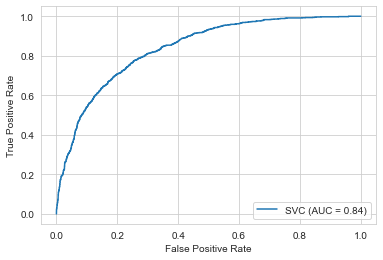

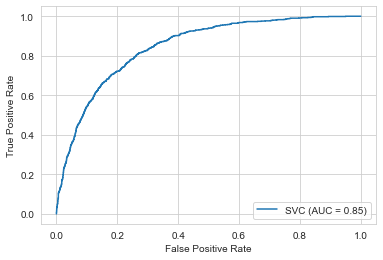

In [80]:
svm=SVC(C=0.1, class_weight={0: 0.6790943139257746, 1: 1.895912547528517},
    gamma=0.02, random_state=0)
svm.fit(X_train,y_train)
print(svm.score(X_train,y_train))
print(svm.score(X_val,y_val))
plot_roc_curve(svm,X_train,y_train)
plot_roc_curve(svm,X_val,y_val)
print(classification_report(y_val,svm.predict(X_val)))

# FINAL MODEL

In [86]:
lr.coef_

array([[ 0.34197732,  0.09480264, -0.20401852, -0.17101936,  0.45765562,
        -0.25035936,  0.07934   , -0.28527841,  0.58311689, -0.29494586,
         0.26884395,  0.02899453,  0.21257966,  0.08525882,  0.06763772,
         0.23020076,  0.31477576, -0.01693728, -0.01370892,  0.3115474 ,
         0.00747793,  0.29036055,  0.70517991, -0.01394159, -0.68834569,
        -0.03254727, -0.16977452,  0.30900517, -0.10379076, -0.76531945,
        -0.76601117, -0.48699892,  0.18866034,  0.7059034 ,  1.12665841,
        -0.18142664,  0.27814069, -1.80991472]])

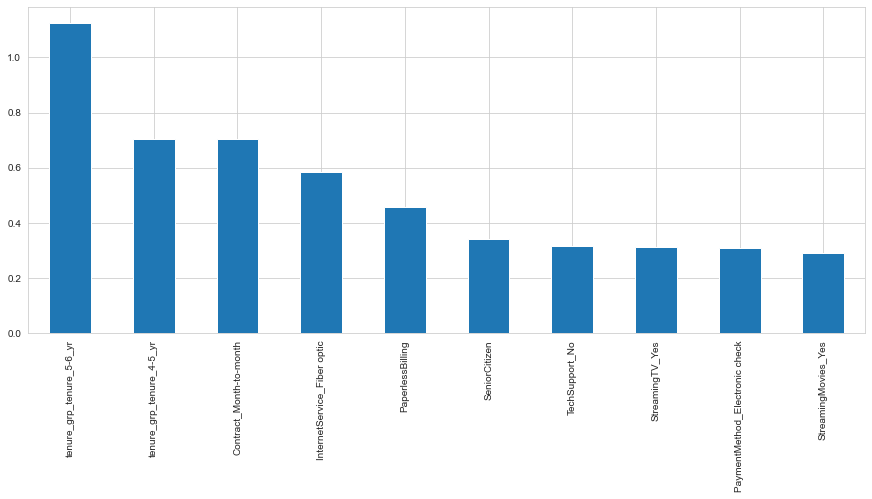

In [87]:
plt.figure(figsize=(15,6))
importance=pd.Series(data=lr.coef_[0],index=X_train.columns.values)
importance.sort_values(ascending=False)[:10].plot(kind="bar")

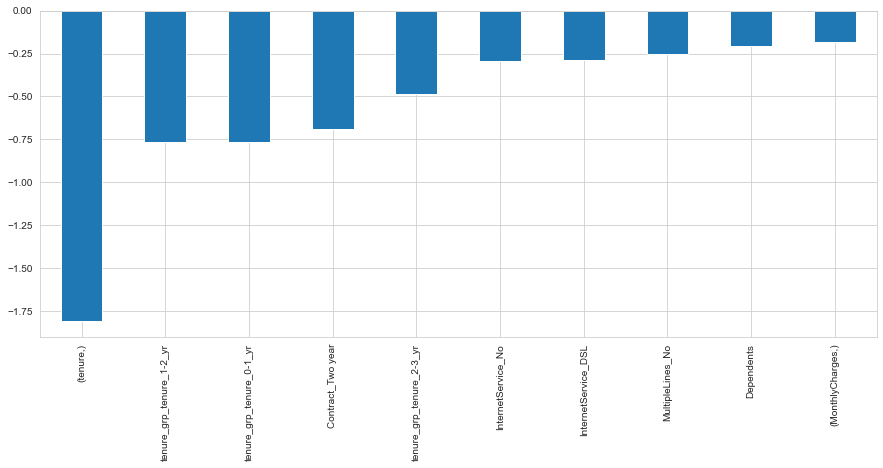

In [88]:
plt.figure(figsize=(15,6))
importance.sort_values(ascending=True)[:10].plot(kind="bar")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2gAAAHzCAYAAABVKD6UAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdd3hmdZ3+8fcMZUYFVIqKZXUt3I66NhRBAduKCKurrpW1gQ0L9lVU7FjX7ooUQeWnYMFFVxFsWCji6thAxw8iYu8NFWYok98f58mSGZmZ5MkJ55wn79d15cpTQrjzJSS5n/MtS6amppAkSZIkdW9p1wEkSZIkSQ0LmiRJkiT1hAVNkiRJknrCgiZJkiRJPWFBkyRJkqSesKBJkiRJUk9sflX/C7/1rW9NLVu27Kr+187ZmjVrGELOoXA82+NYtsvxbJfj2S7Hsz2OZbscz3Y5nu0ZylhedNFFv9t55513uLLnrvKCtmzZMlasWHFV/2vnbNWqVYPIORSOZ3scy3Y5nu1yPNvleLbHsWyX49kux7M9QxnLlStX/nhDzznFUZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExNR0FZfennrn3PFihWtf86FyClJkiRpcmzedYA2LN9iM25y8Eldx9ikC163b9cRJEmSJPXYRFxBkyRJkqRJYEGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BOzKmhJ7pLki1fy+P2TfC3JV5I8sfV0kiRJkrSIbLKgJXk+8G5g+XqPbwG8BdgLuDvwpCTXW4iQkiRJkrQYzOYK2g+BB1/J4yuA86rqj1V1CXA6sEeb4SRJkiRpMdl8Ux9QVR9NcpMreWob4M8z7v8FuOamPt+aNWtYtWrVrAPOxooVK1r9fAup7a99KFavXr1ov/a2OZbtcjzb5Xi2y/Fsj2PZLsezXY5neyZhLDdZ0DbiQmDrGfe3Bv60qX9o2bJlgypUbVusX/uqVasW7dfeNseyXY5nuxzPdjme7XEs2+V4tsvxbM9QxnLlypUbfG4+BW0VcIsk2wJ/BfYE3jiPzydJkiRJi9qcC1qS/YCtqurIJM8BPk2zlu2Yqvp52wElSZIkabGYVUGrqguAXUe3j5vx+CeATyxIMkmSJElaZDyoWpIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeqJzTf1AUmWAocBtwPWAE+oqvNmPP/vwHOBy4FjqupdC5RVkiRJkibabK6gPRBYXlW7AQcDb1rv+TcC/wzcDXhukmu3G1GSJEmSFofZFLTdgVMAquos4E7rPf8d4JrAcmAJMNVmQEmSJElaLGZT0LYB/jzj/uVJZk6NPAdYCXwX+GRV/anFfJIkSZK0aGxyDRpwIbD1jPtLq+oygCS3BfYF/hH4K/D+JA+tqo9s6JOtWbOGVatWzSPy31uxYkWrn28htf21D8Xq1asX7dfeNseyXY5nuxzPdjme7XEs2+V4tsvxbM8kjOVsCtoZwP2BDyfZFTh7xnN/Bi4GLq6qy5P8BtjoGrRly5YNqlC1bbF+7atWrVq0X3vbHMt2OZ7tcjzb5Xi2x7Fsl+PZLsezPUMZy5UrV27wudkUtBOB+yQ5k2aN2f5J9gO2qqojkxwBnJ7kEuCHwHvnH1mSJEmSFp9NFrSqWgscuN7D35/x/OHA4S3nkiRJkqRFx4OqJUmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUHT31l96eWtf84VK1a0/jkXIudCaDvnYh5LSZKkSbd51wHUP8u32IybHHxS1zE26YLX7dt1hFkZwngOZSwlSZImnVfQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ7YfFMfkGQpcBhwO2AN8ISqOm/G83cG3gwsAX4FPKqqVi9MXEmSJEmaXLO5gvZAYHlV7QYcDLxp+okkS4CjgP2ranfgFODGCxFUkiRJkibdbAradPGiqs4C7jTjuZ2A3wPPSvIlYNuqqtZTSpIkSdIiMJuCtg3w5xn3L08yPTVye+CuNFMg/xm4d5J7txtRkiRJkhaHTa5BAy4Etp5xf2lVXTa6/XvgvKr6HkCSU4Cdgc9v6JOtWbOGVatWjRn3yq1YsaLVz7eQ2v7aF4Lj2a6hjOcQxnIhrF69etF+7QvB8WyX49kex7Jdjme7HM/2TMJYzqagnQHcH/hwkl2Bs2c8dz6wVZKbjzYO2QM4emOfbNmyZYP5g3UhLOavfSE4nu1ZrGO5atWqRfu1LwTHs12OZ3scy3Y5nu1yPNszlLFcuXLlBp+bTUE7EbhPkjNpdmrcP8l+wFZVdWSSxwPHjTYMObOqTmojtCRJkiQtNpssaFW1FjhwvYe/P+P5U4FdWs4lSZIkSYuOB1VLGozVl17e+udciGkQC5FTkiQtDrOZ4ihJvbB8i824ycH9n0V9wev27TqCJEkaKK+gSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkaZFafenlrX/OFStWtP45FyKnJEl9tXnXASRJ3Vi+xWbc5OCTuo6xSRe8bt+uI0iSdJXxCpokSZIk9YQFTZIkSZJ6woImSZIkST1hQZMkSZKknrCgSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIkSZJ6woImSZIkST2x+aY+IMlS4DDgdsAa4AlVdd6VfNyRwB+q6uDWU0qSJEnSIjCbK2gPBJZX1W7AwcCb1v+AJE8G/qnlbJIkSZK0qMymoO0OnAJQVWcBd5r5ZJLdgF2BI1pPJ0mSJEmLyCanOALbAH+ecf/yJJtX1WVJdgReDjwIeNhs/oVr1qxh1apVcw66MStWrGj18y2ktr/2heB4tmso4+lYtsvxbNcQxnMhrF69etF+7W1zLNvleLbL8WzPJIzlbArahcDWM+4vrarLRrcfCmwPfAq4HnD1JN+vqvdu6JMtW7ZsUH8UtG0xf+0LwfFsj2PZLsezXYt1PFetWrVov/a2OZbtcjzb5Xi2ZyhjuXLlyg0+N5uCdgZwf+DDSXYFzp5+oqreDrwdIMnjgFturJxJkiRJkjZsNgXtROA+Sc4ElgD7J9kP2KqqjlzQdJIkSZK0iGyyoFXVWuDA9R7+/pV83HtbyiRJkiRJi5IHVUuSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSWrD60stb/5wrVqxo9fMtREZJUrs27zqAJEmTYPkWm3GTg0/qOsZGXfC6fbuOIEnaBK+gSZIkSVJPWNAkSZIkqScsaJIkSZLUExY0SZIkSeoJC5okSZIk9YQFTZIk9coQjiwAjy2QtDDcZl+SJPXKEI4sgOEcW7D60stZvsVmrX7OhSq8beeUhsiCJkmSNMEsvO2y8GqhWdAkSZKkWbLwaqG5Bk2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJEm6ynmkxpVzkxBJkiRJVzk3XLlyXkGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BObb+oDkiwFDgNuB6wBnlBV5814/pHAs4DLge8AT62qtQsTV5IkSZIm12yuoD0QWF5VuwEHA2+afiLJ1YBDgXtW1V2BawL/shBBJUmSJGnSzaag7Q6cAlBVZwF3mvHcGuCuVXXR6P7mwOpWE0qSJEnSIrHJKY7ANsCfZ9y/PMnmVXXZaCrjrwGSHARsBXx2Y59szZo1rFq1aty8V2rFihWtfr6F1PbXvhAcz3YNZTwdy3Y5nu1yPNvjWLbL8WyX49muvo+nY3nlZlPQLgS2nnF/aVVdNn1ntEbtDcBOwL9V1dTGPtmyZcsG9R+jbYv5a18Ijmd7HMt2OZ7tcjzb41i2y/Fsl+PZLsezPW2P5cqVKzf43GymOJ4B7AOQZFfg7PWePwJYDjxwxlRHSZIkSdIczeYK2onAfZKcCSwB9k+yH810xq8DjwdOA05NAvC2qjpxgfJKkiRJ0sTaZEEbrTM7cL2Hvz/jtmepSZIkSVILLFeSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST1jQJEmSJKknLGiSJEmS1BMWNEmSJEnqCQuaJEmSJPWEBU2SJEmSesKCJkmSJEk9YUGTJEmSpJ6woEmSJElST2y+qQ9IshQ4DLgdsAZ4QlWdN+P5+wMvBS4DjqmqoxYoqyRJkiRNtNlcQXsgsLyqdgMOBt40/USSLYC3AHsBdweelOR6CxFUkiRJkibdbAra7sApAFV1FnCnGc+tAM6rqj9W1SXA6cAeraeUJEmSpEVgydTU1EY/IMm7gY9W1cmj+z8BblpVlyXZHTioqh4+eu6VwE+q6t0b+nwrV678LfDjtr4ASZIkSRqYG++88847XNkTm1yDBlwIbD3j/tKqumwDz20N/Gljn2xDQSRJkiRpsZvNFMczgH0AkuwKnD3juVXALZJsm2RLYE/gK62nlCRJkqRFYDZTHKd3cbwtsATYH7gjsFVVHTljF8elNLs4vnNhI0uSJEnSZNpkQZMkSZIkXTU8qFqSJEmSesKCJkmSJEk9YUGTJEmSpJ6woM2QZEnXGSaFY6k+S7Isye1Ht/81yRZdZ5IkLR5Jtlnv/t26yqL+mc05aIvJp4G9ug4xIRzLliW5JnAf4OrTj1XVsd0lGrQPAJ8DvgUEeDiwX6eJJC2IJNsCNwN+VFW/6zrPpEhyo6r6adc5BuzEJPsClwGvAu5Ls0u6xjTaeX4JcFfgq1V1SceRxmZBW9efkvwrUMBagKo6t9tIg+VYtu9E4MfAr0b33YJ1fDeoqsMBquoNSb7QdaAhS/IDYLMZD10K/BR4flV9o5tUw5XkMcALgWU0f2xMVdVNu001TEkeBhwKfA+4TZKXV9X7O441WEmeAVwMXAvYP8kpVfWcjmMN1VuAjwHXpnlR+y7dxhm2JK8HzgduTFN0fw08ttNQ82BBW9cOwLNm3J8C7tVRlqFzLNu3pKr27zrEpEiyU1Wdm+RmrFsuNHenAh8BTgN2A54AvAd4O7B7h7mG6gXA/WlKrubn2cAdq+qvSbam+V61oI3vkcDdgVOAWwOf7zbO8CTZaXTzXOBLNH8bvR/4x9FjGs/uVfWCJF+oqnsmGfT3pgVtXe8EPlZVl3UdZAI4li1JsuXo5vlJdgO+wejq2ZAv33fsWcCHk1wX+DlwYMd5hm6nqvrc6PYXk7ykqj6f5GWdphqu86vqvK5DTIi1VfVXgKr6S5LVXQcauClgR+DXVTU1mj6quTniSh47fPTeF7LHt1mSXYALRn837dB1oPmwoK3rTsAhST4HHF1Vq7oONGCOZXuK5pfiEtb94T0FOO1pDFX1VeD2XeeYIJckORA4k2bu/5okO+PvmHFdlORkmjWS0y/GvKjbSIP1wyRvAr4M7An8sOM8Q/cFmrF8ZJK3AB/tOM/gVNU9AZIsB1ZU1TeTPBA4qdtkg3cs8A7gAOANwNu6jTM/S6amXMYy02iB4f1o/gNfDzgKeL9XgubOsWxXkjtX1ddm3L9HVX2xw0iDk+SEqnpIkl9yxRq+6TU+1+8w2qAl2Q54MbACOBt4PbALzaYM3+8y2xAl+bt1E1X1vi6yDF2SzYEn03xvrgKOrKpLu001fEmuDfzNWRzjS3IC8LmqOjzJ84HbV5WbVc3DaDO1f6CZhfC3rvPMhwVthtHW8PcF9qfZ8ekDNK8A71FVD+gy29A4lu1JsjtwK+A5wJtHDy8Fnl5Vt+ks2ICtv/tYkltaJOYnyXWA5dP3q+onHcYZtFGpeBxwI5orFue4++DcJPmHDT3n9+b4kuwJHEazbvcjwI+r6uhuUw1Tkq9U1W4z7n9h+uqa5i7JvwGH0Pyt+WGaF14P7TbV+Jx+sq4f0Cxyf3tVnTH9YJJbdRdpsBzL9vyJZs7/stF7aHbGfH5niQYqyW2AGwCvT/IfNFfPlgKvwymPY0tyGM3V8l8yuiJJM9VR4zkc+AXNsRpfp5m6s0+niYbnQ1wxNZzR7ZsD16T5WarxHEozVfSjwGuAMwAL2pjcrKpVzwF2pdnA5lCan50WtAlxx6q68Eoev+CqDjIBHMuWVNU5wDlJjqqqX3SdZ+CuDTwCuC5XnHu2luYVYY1vF+BmVbW26yAT4mZV9YQke1TVJ5Ic3HWgoVnvysSWwCuBrWheSND41lbVH5JMVdXqJH/pOtCATW9WdR2aF2TcrGp+1lbVmtH35lSSQU9xtKDNsIFCAc2WspoDx3JB/HMSz0aah6o6DTgtyR1pNmDYAfhNVTnXe37Oo5neeFHXQSbE5km2B6ZGW8NbfMeU5HbAe2kOpr9zVa3pNtHgnZfktcB2oxcOftx1oKGqqq8muTvNuV3nT+82qrGdluQ44IZJDge+tql/oM8saLOzZNMfollyLMfn2UjtuQnw38AfgG2SPKWqPtttpEH7B+DHSaa3hp+qKqc4ju8QmqljOwJnAc/sNs7wjDapehHNlfInzpxqr7lL8qSqOpLmKs8TgNOBvwFP7DTYgK2/Zmp05WewU/K6kuQ1wEuq6kVJ9ga+CXy/qj7RcbR5saDNjq+ut8exHJ9nI7XnJcAuVfWb0VlonwAsaON7ZNcBJsxPqipJdgB+hzMPxvEVmisTbwBuneTW00+MiobmZq8k+wAHVNXhm/xozcZErZnq0HLgjCSPrqpTaMZz8JZ2HUDSrF2U5OQkr03ymtGrRhrP76vqNwBV9WtgQ1NytRFJnjC6eSDNVuYz3zS+SvL4qvrtaPrtS7sONECfAt4FbE1zJXL67XpdhhqqqnoI8EHgC0n26jrPhFg7mnI7Nfr/fNBrprpSVc+hKbvHJXliki2n37rONh9eQZsdp+W1x7Ec36e6DjBBLkzyaeBLNIeqX3268Hog8JxMT7f1iIJ2fRW4R5LrVdWr8efmnFXVKzb2fJJ3VdVTrqo8k6CqPpjk28BXklyEZ0jO12lJjmdC1kx1qarOTPIk4FTghVyxm/Bg1+lb0Pi/HZ5uXFU/SHJPYGfgu1V18uhDHtNdumFJcouq+sHo9j7AHYCVo8vO4FjOxwdorkzcCjiX5tVhjefjo/dTwM+7DDJwU6NX03/ZdZAJc2lVPTrJO5K8A/Bg5fal6wBDk+QAmjVTB1XV/+s6z9DNWDP1DWBVVX2y60xDNDo38qXAw4F/raovdxypFU5xbLwf2CPJ82g2YrgMeEKStwDMPNBWm3QEwGh3p6fSbMLw+CQvA8dyno6geTXoszSbXLy70zTD9gGaLbfvAlwLOL6q3ldV7+s21uA8cgNvj+gy1ARYAlBVB9Gcg3iPTtNo0UvyKZo/gPewnLUjyU2A2wBXA+6YxKnM41lJM31550kpZ+AVtGnXq6pjknwR+Oequgx4a5KvdpxryPYF7llVl40u3X8J2OiUE23SLapqz9HtjyU5s9M0w3YEzR++n6XZgOHdeHV3HK41Wxh7T9+oqpck+fjGPli6Cnyqqv5rQ08muUtV+TfT3BxPs6HFr7oOMnAv3tjVxyT/WlWD+xlqQRtJclPgbOBmNAu0BztvtWPXSXIHmilP29BcQbsazS47mp/lSa5eVRcluRqwWdeBBsyy247i73dmHfzc/64k+a+qejrwxSTrj6vHFqgzGytnI68F7nVVZJkgF21qraQ2bRZTQ5/JFcsaBsOC1ngu8FHg98A3Rmf5bAU8vtNUw3Q0zW46twGeluRtwDk0izY1P28Dvp3kHJp1aC/vNs6gWXZbUFX/2HWGCfOq0fvHAJfMeHzbDrJMOjdeaZfjOUtJdhrd/HWS/Wim6E0BVNW5nQWbXIP83rSgAVX1NeAOo/9ptqeZ+vSDqnJh9hxV1Vtm3k+yBLhNVbmN+TxV1QeSnExzZeJHVfX7rjMN2Ppl92Ud5xmk6Ss+Sb7CelfSPKh6LEtGv4eOBR5N84fFUpopubt0GWxokmxG88LLB2nWTk2P5aeq6l6AW8W3yzNOZ++IGbefyBWHfU/hVciFMMjvTQvaDKNXLs5NcuroB7jm7/OOZTuS3B/Yn9F00SRU1T7dphomy25rpq/4uClIO3almY4TYPow5bXApztLNFwHAC+iOfesaAra5cDpAL4Aq65U1T0BkiwHVlTVN5M8EDip22TqEwvalRvk5dCecizb80aaTRn+2HWQSVBVf6BZI6nx/S7Jg4Gf0PwR/GZgC5x+O5aq+hjNmsh9qspzD+ehqo4Cjkry1Ko6rOs8i4C/6+fu/cDngG8COwEPA/brNNFkGuT3pgXtyp3edYAJ4li257tV9cWuQ0gzHEazXndr4Do0V3p+ChyDU3XmLMkhVXUo8Ogkj5r5XFX5h9t49qP5PtU8jM5AO76qLt7Ahxx3VeaZEDeoqsMBquoNSb7QdaChS7KUppDdFfhqVV1C88Lh4FjQuNLDlVcn2XvG4coa3w+6DjBBPj5a67Nq+oGqOqDDPIOV5HlV9cauc0yAf6qqu47W+3yvql4GkMQpj+P5xOj94Z2mmCx/G51pWjTTRamqIzf+j+hK3BZ4UZLPAEdW1bdmPjm6Yqk5SrJTVZ2b5Ga4WdW8JHk9cD5wY+COwK+Bx1bVJzb6D/aUB1U3Nnq4smYvyWtmvgGvnHFb8/MM4K3Ah2a8aTz7jEqF5mc1QFVdDvx8xuP+bhlDVX07yZOAM6rqSzSFYsXotsZzJs3GX9elOcx2x27jDFNVPQtYAZwKvDrJGUken+TqHUcbsmcCH07yC5rf58/uOM/Q7V5VRwC7VdXewA27DjQfXkFbl4crz992NFvsH0FzmflimlcuNX+/qipLWTu2B36R5Ec0OzxNuevgWLZLshfN/+vbzrzdbaxhSvJymp+f7wcuo5ku+uwkO1TVqzb2z+rKVdUrkuwL3Lq5O7wDa/titLHKCcAJSXakKRg/ofl5qjmqqv8Fbt91jgmyWZJdgAuSbAns0HWg+bCgNTxcuSVV9eQkTwbuDjyN5vLy+zqONSkuTnIKzYLi6TNTXtRtpMG6f9cBJsQ3gGtbv3YAACAASURBVEeObn9zvduau/sBu1bV9P/fFyR5OM1VIAvaGJK8FrgFzXroxybZo6qe13GswRrtPPggmrP6tgae320i6f8cC7yDZgfXN9AcpzNYFrSGhyu3qKqOSPJt4GM0P8DVjkHOo+6py4DX07zCdgLwHeDHnSYaoKraf/3Hktyoqn7aRZ4J8Nfpcjatqi5N8peuAk2APavqbgCj3+1ndZxnkJLcA3gscA/g48B/VNU5XWaSZqqqw5J8APgH4MVV9beuM82HBY2/P1wZIMn/Ha6c5F+dFjE3VXVWkscBD535uGM5vukrkUleWFWv7TrPwB0JvAl4CfBl4H00Z1BpDEmeQTOd+VrA/klOqarndBxriC5OctOqOn/6gSQ3ZaAHrfbEFkmWVtVamum3juV4XkGzdOHAqlrTdZhJMNoYZJeqOn50pfeIqrqg41iDleTfgENous2Hk0yNdsUdJBdyb8B0ORt5ZmdBBqyqflVV71jvYcdy/u7TdYAJsLyqTqVZe1aMNrvQ2B5JU3LvR7PWx3UV43kBzTlob0lyUJL/pJmJ4JS88X0IOGO0k+PpwAc7zjNU366q4yxnrTqWZmkNwMk0s7k0vufQvND6O+BQmqm4g2VBm51BHnLXU47l/DmG87cmyX1pFhXvigVtvqZodsf79WiKnpuEjKGqvgvsQbOG7xo0a/zuVlWu6RtTVb0JeCJNOXtiVb2140hDdZuuA0yi6bNNq+rL+Df5fK0dvYAwNfo95BTHRcApEe1xLOchybbAS5NsX1W/6zrPgD0JeCPN7mPPA57SbZzB+wLNVNFHjq5UfLTjPINVVX9O8qiq2qvrLJMgyU7Aq4EA5yR5blW53nTubjA6AuLveK7c2P40GtOvALsArjWdn9OSHA/ccLQT+9e6DjQfFjRpIJI8jOay/feA2yR5eVW9v+NYg1RVPxudzbcTcE5V/ajrTENWVS8GXgyQ5Guj7bg1vj8leQBwLlccrnxut5EG61ia9VNnArsD7wXu2WWggdoSuB5/P4PDF13H9zian5sPovm9fkCnaQauql6UZG+amQerquqTXWeaDwva7DilrD2O5fieDdyxqv6aZGuaA0MtaGNIcgiwN80rbM9O8hGnPo0vyUOBzYBlwBuS/GdVvbHjWEO2A+seWjsF3KujLEP3t6o6eXT7pCRuXjOeC6rqlV2HmARJblhVPwOuDRw246ltadZPaQ6S/EtVfXLGFd4/A9dP8qQhX921oK0nyS2AmwNnAz8fzWN9c7ephsmxbN3aqvorQFX9JYnrpsa3D7B7Va1NsjnN+hQL2vieRzOmH6TZ4vgzNFNINYaqumeS7YCbAec7nXlefjp6QeZUYGea9ad7AVTVZzpNNiw/7zrABHnO6O2I9R73hZjxbDd6v2OnKVpmQZshydNpLjVvS7Mj2c2Bp1eV50/NkWO5IH6Y5E00a332BH7YcZ4h+w1wdeCvNFN3ftttnMGbfrHgL1W1ZnSFV2MaXZE8FFiF05nna4qm6N6UZgbHr2l2HZ2ieSFBs1BVjwJIsud6T10K/HR0RUizMH0ESVU51bYF00cQ0VyRPLKqvtdlnrZY0Nb1CJodtE6tqrcmGfQCw445lu07AHgyzTb7q2i25NYcJPkKzR9m1wF+MDpQ/VbA7zsNNnw/Ar4OHJTkZcBXO84zdM8BdnY68/xV1f5J7kCzSch3q+rsrjMN3KE0a9FWAncALgGWJzmqqv6z02QDk+QxwMHA8unHquqm3SUavNNppthvDbwH+FBVXdxxprFZ0NY1vcXp9KJXz/sYn2PZvrdW1dOn7yQ5FnhMh3mG6BFdB5hEVfW4JFuNCsXXq+pXXWcaOKcztyTJq2imjf0v8IwkJ1ok5uUi4LZVtTrJMpodWx9MM7PDcZ2bFwAPAH7adZBJUFUnACck2RF4C82yhWt1m2p8FrR1HUfzQ+bGST5Fc0CoxuNYtiTJ04BDgG2TPHj08BKaXZ80N/epqncneS1/v/vYi7oINAmS3Bo4PMm1gA8kOWfoO2h1zOnM7bkfsMtovelmNFuaWyTGt0NVrQYYTWfevqouSeIZXnN3flWd13WISZHkH4DHAg+hucJ7v24TzY8FbV2fBT5PcyBjVdV3Os4zZI5lS6rqncA7k7yoql7TdZ6Bm36l8vudppg8bwf2B44CjgZOBixo45s5nfl7NNOgNJ6fAVvT7Oy2Bc0aNI3vY0lOp7kieWfgf5I8BTin21iDdFGSk4FvMXrBsKp8oXB8HwXeTbMB2ODPlLOgrevoqtqdZn2P5sexbNl0OUvytqp6Ztd5BupG0CwqTrJktLOoWlBV5yWZqqrfJhn8L8cuJLlTVX2dZkreD0Zv0Jzb5YYW47k+cO6M9aaXJDkToKru2mmyAaqqVyX5OLACOKaqzkmyA3B4x9GG6FNdB5gkVXXnJPsCByY5t6o+3nWm+bCgretvSd4CFFccDjrYMxQ65lgunH/qOsCA7UfzChs0V3jd0rgdf0jyZOAaSR4B/KnrQAN1b5rNVh653uPuODi+h3YdYJIkuRHNGZLLm7t5sOejje0DNFfKb0VzKP27uo0zbKOlC7eg2SzksUn2rKrndhxrbBa0dZ05en/d0XtfXR+fY7lw/tZ1gAFbsoHbmp/H06zh+x1wp9F9zVFVvX70fv+us0yQx67/gIViXj4CfA43tmjDETQvZn0WuDvNi4du/DW+PavqbtDMNALO6jjPvFjQ1vWergNMEMdyASTZHnjaaDEsVfWTjiMNzdQGbmsMSXaacfeYGbe3B/5wFceZGEleSLPD20U0LyRMVdX1u001WNNrzpYAd+SKHYY1nr9U1SFdh5gQt6iq6XPlPjY99VZj2yLJ0qpay+jnZteB5sOCtq4P0fwHXQr8I838/907TTRcjmXLkhxJMwXq11zxw8c1FHNz6yTH0Yzf9G0Aqmq/7mIN1hGj91Nc8T05/d7po+N7OHD9qrqo6yBDV1VHzLw/2pRB4ztnNI35m1yxscW53UYarOVJrl5VFyW5GrBZ14EG7kPAGUnOAu4yuj9YFrQZqmq36duj7aKP2MiHayMcywVxW+DmbmwxLw+bcdtF7fNUVfcESPIfni3VqguAwR6w2ifrXeXdEfiHrrJMiNuP3qb5Ysz43gp8O8k5NOvQXtZxnkGrqjcl+TRwS5qN6ga9s6gFbcP+DNys6xATwrFsxy9otou+sOsgQ1VVX9rY86NDbB90VeWZIPdL8uaqurzrIBNiS+DsJGdzxVUKr/COZ+aLg6uB53UVZBJMvyijVvyS5krPTYEfVdXvO84zSEleeiUP32roG9hY0GZI8hWumKKzA81CWI3BsWzPjLG8DvCDJOePnppym+jWXavrAAO1A/CLJD+i+V71e3N+Xt91gEkx4yrvtYDLJ+F8pC4kOaGqHpLkl1yxtsf1kfPzitEaNNfrzs9BNJutHE9z7uFEbABmQVvXI2bcXl1VHmg5PseyPdNjuSVwyYzHt+0gy6Rz+uh4/qXrABPmGzSbhOwInAR8p9s4w5PkjjSHpu9C8/15OPCnJM+rqk90Gm6Aquoho/c7dp1lgkwlOZF1jyPyoOq525Hm6IdHAnegObD6hKr6a6ep5smCtq61NP+BlwMkcTve8TmW7VkDbAMcCzya5tWhpTRTd3bpMJc07TKaqz47ACfQFIofd5po2I4BTqbZevvo0dvdO000PK8GHltVlyZ5NbAPzWZVJwMWtDEluT+wP6Pf7QBVtU93iQbtmPXu+wLhGKrqMuCTwCeTbAU8GDguyUVV9YiN/9P9ZUFbl+d7tMexbM+uwDOBANOHfa8FPt1ZImldRwJvAl4CfBl4H833rcazXVUdk+RRVXVmkomYsnMVW1pV30lyfeAaVbUSIMnajnMN3RtpDlf+Y9dBJsCdq+rp03eSHEvzQqzGtzNwN+DGNOfLDZYFbV2e79Eex7IlVfUxmjNS9qmqT3WdZ8L5R8d4llfVqUkOqapKsrrrQEOX5Jaj9zcE3Hxl7qbPO9ub0RroJMtoNlrS+L5bVV/sOsSQJXkacAiwbZIHjx5eCny3u1TDleTONDO27gN8BTgOOHDoO15b0Nbl+R7tcSzb94skh7Hu1JIDOswzWEluwHpT8qrqq1X1b90mG6w1Se4LbJZkV5rd8jS+ZwDvodl6+2PAE7uNM0ifS3IGcCPgAUluBrwL+HC3sQbv46ONq1ZNP+DvobmpqncC70zyoqp6Tdd5JsBXab4fT6FZp78XsNdoac1g1/RZ0Nbl+R7tcSzb917gv3DaaBuckteuJ9FMfdqeZhvzp3QbZ5jW29jiP2kKxTY0JeObHUYbnKp6fZL/AX5TVb+fLmhVdWLX2QbuGcAbaHbN0/yck+SVVfXSJKcAb66qz3QdaoD27zrAQlgyNTXoK4CtS3JNmrmr5w99B5iuOZbtSnJKVe3ddY5JkOTzVXXvJKdW1b2SfLGq7tF1riFLcgeadZLfraqzu84zRElOBl4wWjv1PeBRwHnAyVV1t27TDdPo99B9gKtPP1ZVrvMZU5KTqmrfrnNMgiTfAPauqt+Mvk9P9niS8SXZc72HLgV+WlU/6yLPfHkFbYYk/0YzL3hz4MNJpqrq0I5jDZJjuSAuSHIw604b9dW28Tglr0VJDgXuCfwv8IzRgd//2XGsIVp/Y4tvgBtbzNOJNDuK/mp031el5+fi0dWemb+HBjuNrGOXVtVvAKrqz0lcazo/hwLXA1bSbLd/CbA8yVFD/H1kQVvXc2imOZ1C8x/666P3mjvHsn3LaK5QZHR/CrCgjccpee3aG9ilqtYm2YxmofbgfiH2gBtbtG9JVU3kFKiOeERBe/43yXE0Py93wWnM83URcNuqWj36uflRmi33v8wAfx8t3fSHLCprq2oNMDXa/eVvXQcaMMeyZaM/Mt5Ec47P21yYPS8XA0dX1a2BL+LujfP1M64oEVsAHkw/numNLV4OvGO0buoTwIc6TTVASbZMsiVwfpLdkiyb8ZjG9wHgXOBHwAU0Vyk0nmfQbFpzNeDDVfWMjvMM3Q5VtRpg9Pfn9lV1CQPtOl5BW9dpo1czbpjkcOBrXQcaMMeyZUkOAvaj2bHoeUk+XFVv7DjWUH2Q5qBvgD8A7wf+pbs4g3d94Nwk36bZefCSJGcCuKZi9tzYolVFM8tgCc0GVdO3p4Cbdphr6P4b2BK4AbAZ8Avg+E4TDddWwJ2AHYHzkty8qs7rONOQfSzJ6TRT7e8M/E+SpwDndBtrPG4Ssp4kewP/BHy/qryUPw+OZbtGWxvvUVWXJdkCOLOq7tx1riFKcubM4jC9WUiXmYYsyY039FxV/fiqzCLNNDrk+4ZV9dMkd64qXyychyRfqqq7J3k3cBDw2aravetcQ5TkIzQzYvYHXgC8tqru3m2qYUtyW2AFzWZV5yTZAfjdEM9E8woaMFozsRnNq+oPB06l2TzAP9rmyLFcUEuq6jKAqro0yaVdBxqwS5LcBziLZu6/mzDMzxbAQ0fvlwDXr6ondxtJApqjCn5Gswb6UUn+vaqe1XGmIZv+vXONqrrYKaPzsl1VHZPkUVV15ujFBI0pyY1o1u8ub+7mwVX1yo5jjc2C1jgAeBHN7i81emwtcHpniYbLsVw4pyc5ATgN2AM4o+M8Q/YEmk1C3g58D7BMzM+xNGuldqeZ8rRVt3Gk/3OHqjoQoKqemeTLXQcauBOTvBT4dpKzgAu7DjRkSW45en9DwF0c5+cjNJsrTcRZsRY0oKqOAo5KckBVHbP+80nuUlVf7SDa4DiWC6eqnpdkX5rL9++pqpO6zjQ0STYfXYX8CfAwrliTovm5qKpem+QWVXVAktO6DiSNLEmy3WhN37Xw7555qap3Tt9OchLNOX0azzOB99D8Tj8BeGq3cQbvL1V1SNch2uIPqhmurFCMvJZmkbFmybFsT5LHrPfQb4DtkjzGA1fn7FiajVamNxAANw5ow5Ik1wO2SnINYNuuA0kjrwS+nuSPwDXxj+B5SXJr4HDgWjQ7Op4DfLLTUANVVWcDu3WdY4Kck+QRrHtG37ndRhqfBW12nBfcHsdy7t5Nc9DqJ2gOVHYMx1RV+41uPqiqvtVpmAmRZBvgFcADaXbD/BFNEZY6V1WfTHIycF3gl0PcLKBn3k6zqcVRwNE0m1xY0OYgyS/ZwMyNqrr+VRxnktx+9DZtigFfELCgzY4/0NvjWM7dDYBH0GwD/xPgA1X1xU4TDd+rkmxHM73k+Kr6a9eBhijJ04HnApcBB1XVKcB1uk0lXSHJ3YF30mxe9ZEkP66qozuONWhVdV6Sqar6bZK/dJ1naKpqx64zTKKqumfXGdo0yMPbpMWkqn5bVe+oqvsCrwP2TPKZJK/tOttQVdX9gQfTTNP5zGjLaM3dfkBopuk8s+Ms0pV5FbAn8CvgNTjFcb7+kOTJwDVG08n+1HWgoUnywhm37z3j9ru6STRso83TSPLLJL8Yvf0yyS+6zjYfXkGbHaeUtcexnJ/LabY53ga4ecdZhm4LYBnNC1WXdZxlqFZX1SXA79xuWz21tqr+MLris9orPvP2eJqdmn9Hc8jy47uNM0j3oVmPD/Bi4POj27fsJs6wVdVDRu8n6sqkBW09SbYHbgb8oKr+MHr4uA4jDZZj2Y7R5gsPozln6iLgeGCvqnJ74zEl+TzNWSlHA/euqr91HGkS+OKLeiPJh6rq4cB5o9kG2yc5mGY9r8b3rqr6965DDNySDdx2Ccg8JLk/zfrI5dOPVdU+3SWaHwvaDEmeCjybZleiWyV5VVW9f7R1vObAsWzVz2h2HfwQ8GtgS+ARSaiqIztNNlxfGvIBlj1y6yTH0fyRMX0bWGdDFqkLO4zeH0hz7uFpwF9HtzW+5UluC5xLc8Ypo6vomr2pDdzW/LyR5kzTP3YdpA0WtHU9Efin0TSIqwNfotmVTHPnWLbnUJof4ktoDgDX/N2bZvttzc/DZtw+vLMU0t+7WZLXzLh/Ic2GS6+gmaKn8ewEfHzGfY8ombsbJHkSze/0mbfdwXF+vjtJG6hZ0Nb1a65Yi3Ix8PsOswydY9mSqnr5xp5P8q6qespVFGdSLEvyTZork9OvAnvFZ46q6ktdZ5A24CKa/7/VrgOq6mvTd5Lco8MsQ3UcsOOV3D6+mzgT4+NJvgKsmn6gqg7oMM+8WNDWtRT4VpIzgTsAW0xP2fGPtzlzLK866TrAAL2g6wCSFtSvqup9XYeYFEn2AG4FPDvJm0cPLwWeDtyms2ADVFWv2Njzvug6tmcAb2BCdha1oK3rMK6Yu/qBLoNMAMdSffYNmpK2I3AS8J1u40hq2cquA0yYP9JMsV82er8tzcyY53cZakL5out4flVVH+o6RFssaOt6XlXt3nWICeFYqs+OAU4G7k6zk+PRo9uSJkBVPa/rDBNmS+BBND8n7wS8i+ZKxbe7DCXNcHGSU4BvMtp8paoGu97UgrauPyR5JuuuS/lMt5EGy7FUn21XVcckeVRVnZnELeIlacNeDTymqn4y+iP4fsB5NC90/U+nyaTGJ7oO0CYL2rp+D9x+9AZNA7dUjMexvOpYLsaQ5Jaj9zekOQBcknTlllbVd5JcH7hGVX0DIMnajnNJ0z4A3BnYggnYFdOCtq6XrXf/0iRbVNWlnaQZNseyJUk2AzYDPgg8nOYHz1LgU1V1L2CvDuMN1TOA9wArgBOAp3YbR5J6beno/d7A5wCSLAO27izR5PJF1/H8N81U3BvQ/M30Cwa8M6YFbV2fBG4IfJ/mrI+LgM2TPL+qPMNrbhzL9hxAc27P9WimjC6hmTZ6GoCld+6q6hxgtyTXBi6rqr90nUmSeuxzSc4AbgQ8IMnNaNahTcymDFeVJI/Z0HNVdSy+6Dqua1bV3ZO8GzgI+GzXgeZj6aY/ZFH5EbBTVd0VuAXwNZrtYw/qNNUwOZYtqaqjquofgadV1U1Ht1dU1eM6jjY4Se6Y5JtJtkjyIJoXEL6e5P5dZ5Okvqqq1wNPAO5QVd8aPfyuqnpth7GGasXobX+aWTE3Ah48uu2LruObHrdrVNXFNFfTBsuCtq7rVtXvAKrqj6P7f2C0yYXmxLFs3+ZJ3jK6/ckkj+40zTC9Gnjs6Bfgq4F9aOasH9xpKknquapaVVW/H93+YVWd2HWmIaqqF1bVC4E1VbVvVb26qh5Is3ZK4zsxyUuBbyc5C7iw60Dz4RTHda1McjzwFWA3moOWHw78uttYg+RYtu9A4K6j2/sCXwb+X3dxBmn9he4rwYXukqSr3HWSXKuq/pRkO2C7rgMNWVW9c/p2kpNodhkdLK+gzVBVT6NZUHg14P1V9XTgW8ALOw02QI7lgri8qlbD/02BmOo4zxC50F2S1Aevppli/w3gq8CzO84zaEluneS0JGfTvIh9764zzceSqSn/xtuUJKeOdsvTPDmW40tyCHBf4H+BOwKfrqrXdZtqWJK8AHgAo4XuwF9oFrp/sape02U2SdLiMjqDcwfgd1XlTI55SPJ5/n97dx9rWVXecfw7Q3lpBrUwUqcTaBGVn1hsEdHoFFBJVLDGgm2BTpXKiNJStdqkYgh/FAekGKNJgwVEoBq0yktE1AKt0Ka8NNZmAKGFh8LAVEUqMNIyjIAwp3/sc+VexZa5c+asved+P8nN3vvM/PHLSubOefZa61lwPHAucCRwRVUd0DbV/DmD9szY8nRyHMt5qqpT6Zqs/Avwfouzzfd/bHS3OJMkTU2S1wF3AVcBa5O8vnGkwauqO4FRVd1P9wJ2sCzQnhmnGSfHsZynJC8EDgMCHJ7knMaRBqmqbgNOGd/fVVVfSvLZxrEkSQvLauDAqnoZ8BvAqY3zDN36JMcDS5IcDTzUOtCWsEmINByfBb4CHEh3AOPObeMMT5I/Bk4Gdk3yVp6a0f33dqkkSQvQk1V1L0BVfTfJo60DDdw76c6MfQA4YPw8WBZoz4zL8ibHsZy/jVV1epIXVdWqJNe2DjQ04y5Pn0xykssaJUkN/U+S99J1ZD4YWN84z9CdVVW/3zrEpFigPY0ku4zP7ppxTbMwA+dYTtSiJMuAnZMsAXZtHWjAzkyyGlgOfA341njtuiRJ0/A2uhUdp9Gt4ljVNs7g7ZTk14A7GJ+5W1WPt400fxZosyR5DfBJYLskFwPrquq8qlrdONrgOJZbxSnA4cCFwN10Sx41P+cBVwCvHd+fB7ymZSBJ0oKyAfgisIRuf/5L6WbTND97A1+e9TwC9mqUZYtZoM21mm6a+VLgI8D1dF/ctPkcy8l7ZVV9bHz/i02TDN/Sqjo/yduq6oZxq2NJkqblEuA5wH102z9GWKBtiVVV9c2ZhySvbZhli1mgzbWpqtYnGVXVo0kG3aKzMcdy8t6U5BNV9WTrINuCJC8eX3cHHFNJ0jQ9t6oOah1i6JIcBLwE+ECSj48/Xgy8B9i3WbAtZIE2151JTgeWJvkQsK51oAFzLCdvN+DeJHfTvWkbVdWKxpmG6n3ABcA+dG8xT2gbR5K0wKxLskdVfbt1kIH7AbAM2HF83RV4EPhgy1BbygJtrhPoNmleBzwCvKttnEFzLCfvrcDsDa82CZmnqroVeHXrHJKkhSXJ9+hesu4EHJnkwfEfjapqebtkg7UDcATdPvIDgLPozkC7uWWoLWWBNtdXq+oNrUNsIxzLCRl3bnw2XVOQt9OtVV8MnAO8smG0wUpyDPAhuv8gAaiqwW4mliQNQ1X9EsBPzp7NLLvXZjsNOKaq/jPJlcBhwJ10jcAub5psC1igzfVQkrcwt0XnHW0jDZZjOTmvAv4ECPCp8WebgKuaJRq+E4G3AC4tkSRNTZJ96Y54+WiSP+Opl65/AezXMttALa6qbyVZDiypqjUASTY1zrVFLNDm2g34wKznEXBIoyxD51hOSFVdBlyW5E1V9bet82wj1nrumSSpgV2A3wOeB6wcf7YJ+KtmiYZt8fh6KPB1gCQ7As9qlmgCFo1Go9YZJD0DSfYD3s3cZXkebDkPSb5It2z0JrqXB1TVSU1DSZIWjCT7V9WaJLsAD1WVX8jnIcnMipg9xteH6fah/UNVnd4y25ZwBm2WWd3xZvx3Vb2sVZ4hcyy3ir8GzsRleZNwFbbWlyS186wktwLbARcnWVdVnhe7marqjCSXA9+vqgeTvAA4q6q+1DrblrBAm2tmg+Yi4OXA7zbMMnSO5eTdV1Wfbh1iG3G0TWwkSQ2tBg4GLgU+AlwPWKDNQ1XdNuv+LuCuhnEmwgJtlqp6bNbj9eNzvDQPjuVWcc/4TLkbeWpZ3t+1jTRYNrGRJLW0qarWJxlV1aNJHm4dSP1hgTbLuIiYWZa3nPEXN20+x3Kr2JGuk2PGzyPAAm1+bGIjSWrpzvF3paXjl6/rWgdSf1igzXX7rPubgStbBdkGOJYTVlXHjtvzvgS4o6puap1pqKrqdUmeA/wKXUfHDa0zSZIWlD8EjgOuAzYA72obR31iF8dZkiwCXsHcLnn/1C7RcDmWk5fkvXQteb8BrAAuqqqPtU01TEl+GziZ7iXVRcCoqk5tm0qStK1LcvDP+jO/J2mGM2hzXUq39Ok74+cR4D+W+XEsJ28lcFBVPZFke+AGwAJtfv6U7gDwK4FTgX8dXyVJ2pr+ka6JxTfHz4vGV78n6ccs0OZaVlUrWofYRjiWk7eoqp4AqKofJflR60ADtqmqHhtvzh4leaR1IEnSgnAA3QvX/YFrgM9V1d1tI6lvLNDmuj3J8qq6t3WQbYBjOXnXJbkEuBY4kK4lr+bn2iSfB3ZPcjZPvcmUJGmrqao1wJrxVpBDgJOTLAMur6pz2qZTX7gHbZYkdwB7AQ/QTTWPqmp521TD5FhOVpJ3AxcAb6A7V259VZ3ZNtWwJTkUeClwe1V9pXUeSdLCkuTngcOBY4DnVtUrGkdST1igST2X5M+BfYFjqmpjkj2BjwM3VtXqltmGJsl2wHbAF4Cj6Nb+u+UHfQAABN5JREFUbwd8rapssy9J2qrGe8gPo1vmuDdwOfB5z+LUbC5xnCXJrwJnA78AfA64taq+2jbVMDmWE3UY8Kqqmjmc+p4kR9E1CbFA2zyrgJOAZUDRFWhP0rU5liRpa/s+cC/wN3QrY0bAnkn2rCrPNhVggfaT/hI4FjgXOA+4ArComB/HcnI2zBRnM8ZNQh5uFWioqupc4Nwkq6rq/NZ5JEkLzpfpirIXjH9mjAALNAEWaD+lqu4cd3a73y/AW8axnJgfJtmrqtbOfJBkL7pf5pqfv0/yQeae0/fhhnkkSQtAVb0DIMmbZ68sSnJks1DqHQu0udYnOR5YkuRo4AetAw2YYzk5JwKXJbkaWAv8MvBG4A+aphq2i4GvA99uHUSStHAkeTOwAliZZOY4osXAbwEXNQumXrFAm+sWYE/gfrpzKu5vmmbYHMsJqap/S3IQ3S/v5cAa4MNV5azk/D1cVSe3DiFJWnBuBpYCP6TbCw2wia55lQTYxRGAJO8EjgP2AW4bf7wY2L6q9m8WbIAcSw1Bkk8A3wBuZLxU1A5akqRpSbK4qja1zqF+cgatcyFwNV13t9PGn22i67SjzeNYagj2G//MGNEdGCpJ0jScmOREYCNdR2HPi9WPOYMmSZIkTVGSm4AVVbWxdRb1jzNokhaMJP/Mz+h+WVUrnu5zSZK2gnvo9qFJP8UCTdJCcnTrAJIkATsAtyS5haf2Qq9sG0l9YYEmacGoqnWtM0iSBJzROoD6a3HrAJIkSdICswZ4PXAMXdv977aNoz6xQJMkSZKm63xgLbA3cB9wXts46hMLNEmSJGm6llbV+cCPquoGulb7EmCBJkmSJE1dkhePr7sDTzaOox6xSYgkSZI0Xe8DLgD2AS4BTmgbR33iQdWSJEmS1BPOoEmSJElTlOQ0YBXjM9AAqmp5u0TqEws0SZIkabp+E9izqh5rHUT9Y5MQSZIkabpuBHZqHUL95AyaJEmSNF23At9Lch9di/1RVe3VOJN6wgJNkiRJmq6jgOcDD7UOov6xQJMkSZKmax3wiHvQ9HQs0CRJkqTp2gO4K8na8fOoqla0DKT+sECTJEmSpuvtwOOtQ6ifLNAkSZKk6boUuAb4dFXd2jqM+mXRaDT6//+WJEmSpIlIshg4FDgW2A24EPhCVW1oGky9YIEmSZIkTVmSRXRF2nHAC4ENwGeq6lNNg6k5D6qWJEmSpijJR4HbgSOAM6rq14GDgD9qGky94B40SZIkabr+A3j57CWNVbUpyRENM6knXOIoSZIkTVGSFwG/A2wPLAKWV9XxbVOpL1ziKEmSJE3XZ8bXA4HnA0sbZlHPWKBJkiRJ07Wxqk4HvlNV7wCe1ziPesQCTZIkSZquRUmWATsnWQLs2jqQ+sMCTZIkSZquU+g6OF4I3A1c0TaO+sQmIZIkSdKUJHk28ERVbWydRf3kDJokSZI0BUneA9wM3Jzkja3zqJ8s0CRJkqTpWAkEeDXw/sZZ1FMWaJIkSdJ0PFpVj1fVA8AOrcOonyzQJEmSpOlb1DqA+skmIZIkSdIUJPkv4Gq64uyQ8T0AVbWyVS71y8+1DiBJkiQtEEfOuj+7WQr1mjNokiRJktQT7kGTJEmSpJ6wQJMkSZKknrBAkyRJkqSesECTJEmSpJ6wQJMkSZKknvhf6k8ng96DZXcAAAAASUVORK5CYII=

In [89]:
x=importance.sort_values(ascending=True)[:10].index
y=importance.sort_values(ascending=False)[:10].index

In [90]:
lst=[i for i in x]
lst1=[i for i in y]

In [91]:
col=lst1+lst

In [92]:
X_train[lst+lst1]

,"(tenure,)",tenure_grp_tenure_1-2_yr,tenure_grp_tenure_0-1_yr,Contract_Two year,tenure_grp_tenure_2-3_yr,InternetService_No,InternetService_DSL,MultipleLines_No,Dependents,"(MonthlyCharges,)",tenure_grp_tenure_5-6_yr,tenure_grp_tenure_4-5_yr,Contract_Month-to-month,InternetService_Fiber optic,PaperlessBilling,SeniorCitizen,TechSupport_No,StreamingTV_Yes,PaymentMethod_Electronic check,StreamingMovies_Yes
0,1.008133,0,0,1,0,1,0,1,0,-1.464831,0,1,0,0,0,0,0,0,0,0
1,-1.231772,0,1,0,0,0,1,1,0,-0.012824,0,0,1,0,1,0,0,0,0,1
2,-1.272497,0,1,0,0,0,0,1,0,0.208386,0,0,1,1,1,0,1,0,1,0
3,-0.335810,1,0,0,0,0,0,1,0,0.830437,0,0,1,1,1,0,1,0,1,1
4,1.415389,0,0,1,0,1,0,1,0,-1.494770,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,-1.272497,0,1,0,0,1,0,1,0,-1.519718,0,0,1,0,0,0,0,0,0,0
3985,1.333938,0,0,0,0,1,0,0,0,-1.323456,1,0,0,0,0,0,0,0,0,0
3986,0.723055,0,0,0,0,0,0,0,1,1.375980,0,1,1,1,0,0,1,1,0,1
3987,-0.743065,1,0,0,0,0,1,0,1,0.527728,0,0,1,0,0,0,0,1,0,1


0.8092253697668589
0.8057837660203746
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2226
           1       0.68      0.53      0.59       817

    accuracy                           0.81      3043
   macro avg       0.76      0.72      0.73      3043
weighted avg       0.80      0.81      0.80      3043



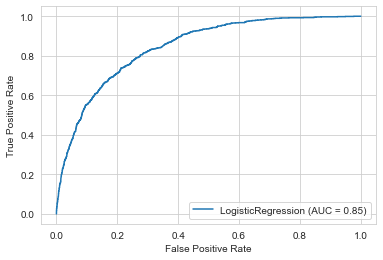

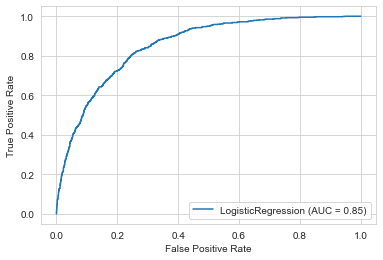

In [93]:
lr=LogisticRegression()
lr.fit(X_train[col],y_train)
print(lr.score(X_train[col],y_train))
print(lr.score(X_val[col],y_val))
plot_roc_curve(lr,X_train[col],y_train)
plot_roc_curve(lr,X_val[col],y_val)
print(classification_report(y_val,lr.predict(X_val[col])))

Tensure between 5-6 yrs and 4-5 yrs having a positive coefficient does not make sense because the customers having a longer tenure should have low churning rate due to loyalty compared to tenure 1-2years which should have churning rate as they are new.




# Model Evaluation

We will use Logistic Regression for futher evaluation

As our dataset is highly imbalanced rather than using accuracy as our metric, we should use AUC,confusion matrix,precision recall etc.

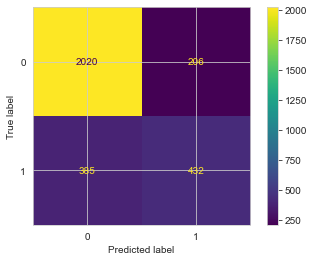

In [96]:
plot_confusion_matrix(lr,X_val[col],y_val,)


True Positive=432

False Postive=206

True Negative=2020

False Negative=365

In [100]:
print(classification_report(y_val,lr.predict(X_val[col])))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2226
           1       0.68      0.53      0.59       817

    accuracy                           0.81      3043
   macro avg       0.76      0.72      0.73      3043
weighted avg       0.80      0.81      0.80      3043



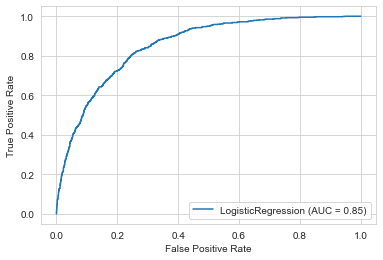

In [102]:
plot_roc_curve(lr,X_val[col],y_val)

We got an AUC of 0.85

### Final Conclusions

Solutions:

1) Firstly the company  should convince users to sign up for additional products  like online security,backup etc, by using fancy advertisement ,personalized emails,SMS marketing and different marketing techniques,ensuring increase in revenue and at the same time it will increase the tenure of the user to a large extent.

2) Nextly the company should focus on an effective and efficient feedback system.This will help the company collect more data for analysis and at the same time help the company to identify the problems for increase in churning rate and also provide tech services in the initial stage of tenure.

3) The company should come up with new yearly plans and promote these plans so that the monthly user can opt for these plans thereby increasing the tenure.

